In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from datetime import datetime

In [2]:
#Reading Dataset
covid_df=pd.read_csv('/content/drive/MyDrive/Projects/Covid-19(Visualization & Analysis)/covid_19_india.csv')

In [3]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [5]:
#Droping unwanted Column
covid_df.drop(columns=['ConfirmedIndianNational','ConfirmedForeignNational','Sno','Time'], inplace=True)


In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  18110 non-null  object
 1   State/UnionTerritory  18110 non-null  object
 2   Cured                 18110 non-null  int64 
 3   Deaths                18110 non-null  int64 
 4   Confirmed             18110 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 707.5+ KB


In [7]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [8]:
#Changing datetime format
covid_df['Date']=pd.to_datetime(covid_df['Date'], format= '%Y-%m-%d')
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18110 non-null  datetime64[ns]
 1   State/UnionTerritory  18110 non-null  object        
 2   Cured                 18110 non-null  int64         
 3   Deaths                18110 non-null  int64         
 4   Confirmed             18110 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 707.5+ KB


In [9]:
#Total Number of Active Cases
covid_df['ActiveCases']=covid_df['Confirmed']-(covid_df['Cured']+covid_df['Deaths'])
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [10]:
#Creating Pivot Table
Statewise=pd.pivot_table(covid_df, values=['Cured','Deaths','Confirmed'],index='State/UnionTerritory', aggfunc=max)
Statewise.head(10)

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Bihar****,715730,701234,9452
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544


In [11]:
#Recovery Rate
Statewise['Recovery_Rate']= (Statewise['Cured']/Statewise['Confirmed']) * 100
Statewise.head()

,Confirmed,Cured,Deaths,Recovery_Rate
State/UnionTerritory,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198
Andhra Pradesh,1985182,1952736,13564,98.365591
Arunachal Pradesh,50605,47821,248,94.498567
Assam,576149,559684,5420,97.142232
Bihar,725279,715352,9646,98.631285


In [12]:
#Mortality Rate
Statewise['Mortality_Rate']= (Statewise['Deaths']/Statewise['Confirmed']) * 100
Statewise.head()

,Confirmed,Cured,Deaths,Recovery_Rate,Mortality_Rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,248,94.498567,0.490070
Assam,576149,559684,5420,97.142232,0.940729
Bihar,725279,715352,9646,98.631285,1.329971


In [13]:
#Sorting in decending
Statewise=Statewise.sort_values(by='Confirmed',ascending=False)
Statewise.head()

,Confirmed,Cured,Deaths,Recovery_Rate,Mortality_Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559


In [14]:
Statewise.style.background_gradient(cmap='Reds')

,Confirmed,Cured,Deaths,Recovery_Rate,Mortality_Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


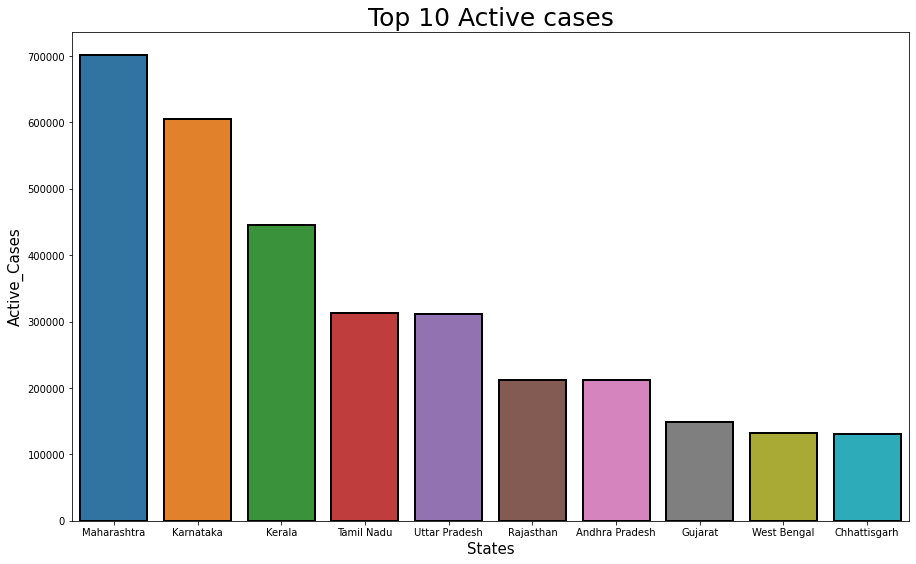

In [15]:
#BarGraph for top 10 active cases
top_10_ActiveCases=covid_df.groupby(by='State/UnionTerritory').max()[['ActiveCases','Date']].sort_values(by="ActiveCases", ascending=False).reset_index()
fig=plt.figure(figsize=(15,9))
plt.title('Top 10 Active cases', size=25)
ax=sns.barplot(data=top_10_ActiveCases.iloc[:10], x= 'State/UnionTerritory', y ='ActiveCases',linewidth=2,edgecolor='black')
plt.xlabel('States', size=15)
plt.ylabel('Active_Cases', size=15)
plt.show()

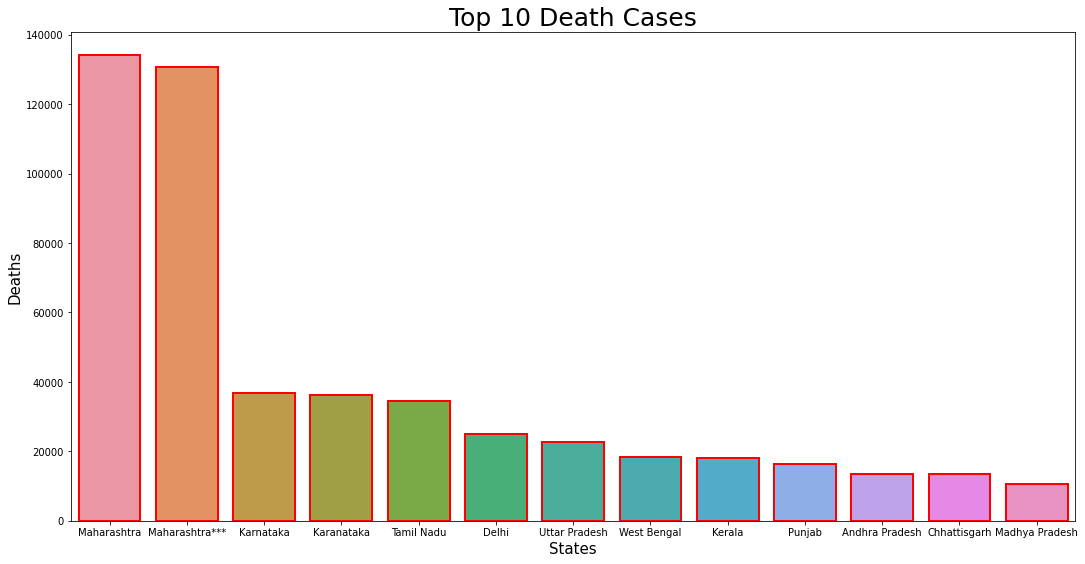

In [16]:
#Bargraph for top 10 death Cases
top_10_DeathCases=covid_df.groupby(by='State/UnionTerritory').max()[['Deaths','Date']].sort_values(by='Deaths', ascending=False).reset_index()
fig=plt.figure(figsize=(18,9))
plt.title('Top 10 Death Cases',size=25)
ax=sns.barplot(data=top_10_DeathCases.loc[:12],x= 'State/UnionTerritory', y='Deaths', linewidth=2, edgecolor='red') 
plt.xlabel('States',size=15)
plt.ylabel('Deaths',size=15)
plt.show()


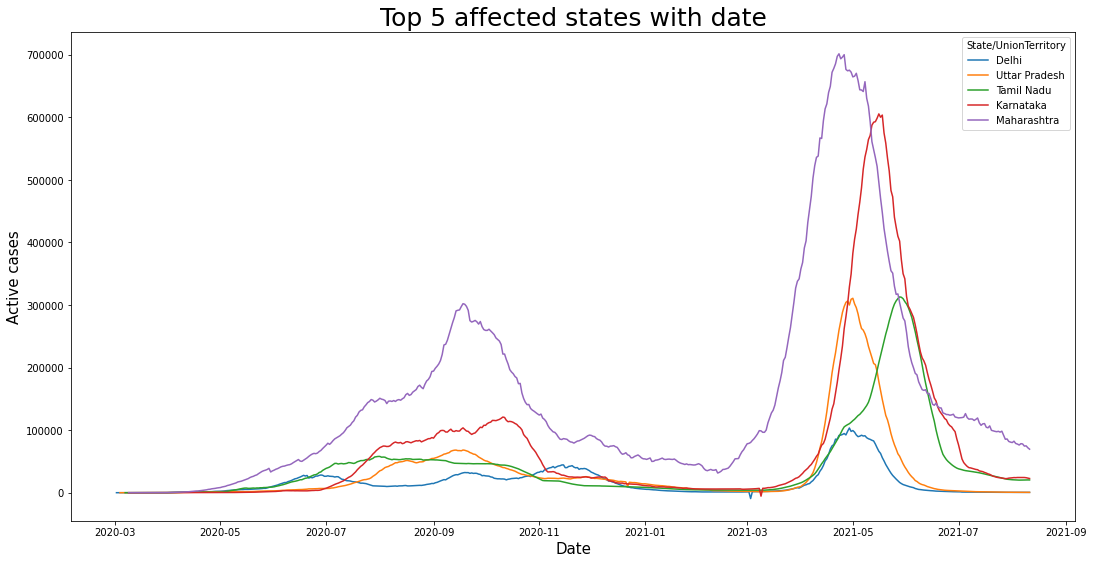

In [17]:
#trend liine with line graph
fig=plt.figure(figsize=(18,9))
plt.title('Top 5 affected states with date', size=25)
ax=sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra','Karnataka', 'Tamil Nadu', 'Delhi', 'Uttar Pradesh'])],x='Date',y='ActiveCases',hue='State/UnionTerritory')
plt.xlabel('Date',size=15)
plt.ylabel('Active cases',size=15)
plt.show()

In [18]:
vaccine_df=pd.read_csv('/content/drive/MyDrive/Projects/Covid-19(Visualization & Analysis)/covid_vaccine_statewise.csv')
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [19]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [20]:
#Renaming
vaccine_df.rename(columns={'Updated On':'Date'},inplace=True)
vaccine_df.tail()

,Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7844,15/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Missing Values
vaccine_df.isnull().sum()

Date                                      0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [22]:
#removing unwanted column
vaccination=vaccine_df.drop(columns=['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','60+ Years (Doses Administered)','45-60 Years (Doses Administered)'],inplace=True,axis=1)
vaccine_df.head()

,Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [23]:
#Male VS Female Vassination
Male=vaccine_df['Male(Individuals Vaccinated)'].sum()
Female=vaccine_df['Female(Individuals Vaccinated)'].sum()
px.pie(names=['Male','Female'],values=[Male,Female], title='Male VS Female Vaccinated')

In [24]:
#Remove State INDIA
vaccine=vaccine_df[vaccine_df.State!='India']
vaccine.head()

,Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [25]:
#Renam total vaccination
vaccine.rename(columns={'Total Individuals Vaccinated':'Total'},inplace=True)
vaccine.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [26]:
#which State has high total no. of vaccination
max_vaccine=vaccine.groupby(by='State')['Total'].sum().to_frame('Total')
max_vaccine=max_vaccine.sort_values(by='Total',ascending=False)[:5]


Text(0, 0.5, 'Total')

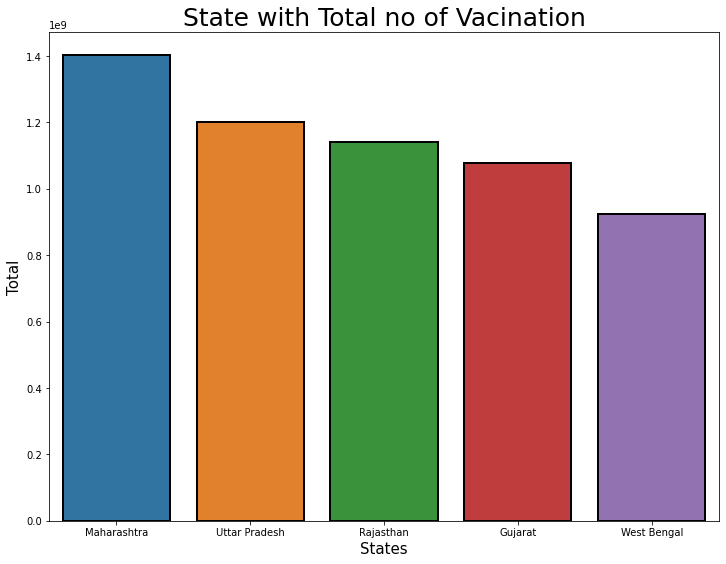

In [27]:
#Creating BarPlot
fig=plt.figure(figsize=(12,9))
plt.title('State with Total no of Vacination',size=25)
x=sns.barplot(data=max_vaccine,x=max_vaccine.index,y=max_vaccine.Total,linewidth=2,edgecolor='black')
plt.xlabel('States',size=15)
plt.ylabel('Total',size=15)